In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../dataset/per_capita_MAIN_ds.csv')

In [3]:
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [4]:
# only 2018 dataframe
df_2018 = df[df['Year'] == 2018]

# non-2018 dataframe
df_n2018 = df[df['Year'] != 2018]

# drop na for both df
df_2018.dropna(inplace=True)
df_n2018.dropna(inplace=True)

D:\Programming\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programming\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [5]:
# train dataset - no 2018 data
X_train = df_n2018.drop(columns=['Country', 'Year', 'Life Ladder'])
y_train = df_n2018['Life Ladder']

# test dataset - 2018 data
X_test = df_2018.drop(columns=['Country', 'Year', 'Life Ladder'])
y_test = df_2018['Life Ladder']

In [6]:
# Create scaler instance and fit training data
X_scaler = StandardScaler().fit(X_train)

In [7]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# use Random Forest Regressor
model = RandomForestRegressor(max_depth=4, random_state=0)

In [9]:
# fit the model
model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [10]:
# predict y with X_test
y_pred = model.predict(X_test_scaled)
pred_values = [x for x in y_pred]

In [11]:
model.score(X_test_scaled, y_test)

0.7298447359977331

In [12]:
# DataFrame of predictions.
results = pd.DataFrame(zip(pred_values, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results.head()

,Predicted,Actual,Difference
0,4.152037,2.694,1.458037
1,5.363978,5.004,0.359978
2,6.187276,5.793,0.394276
3,5.226816,5.062,0.164816
4,7.182113,7.177,0.005113


In [13]:
model.feature_importances_

array([0.06236934, 0.44188411, 0.39049359, 0.07328119, 0.03197177])

In [14]:
feature_importance = pd.DataFrame({'Feature importance': model.feature_importances_}, index=X_train.columns)
feature_importance

,Feature importance
Temperature,0.062369
Clean Water,0.441884
PM2.5,0.390494
pc Greenhouse Gas Emissions,0.073281
pc CO2 Emissions,0.031972


In [15]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

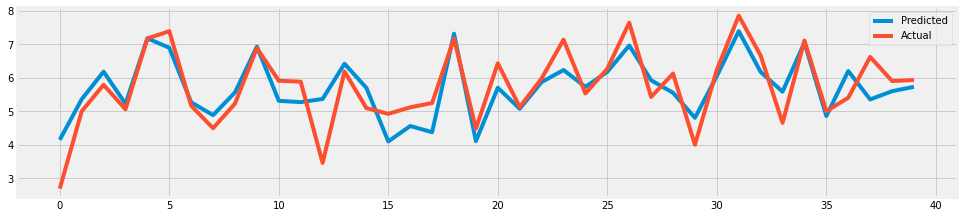

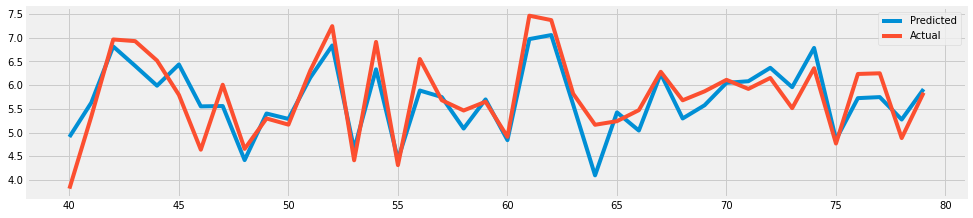

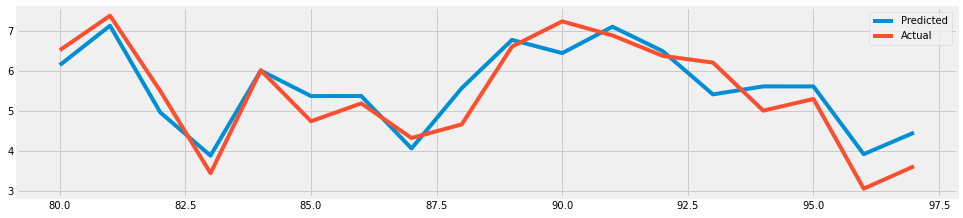

In [16]:
# Try and plot the differences.
bins = [0, 40, 80]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))